In [109]:
import sympy as sp

In [110]:
y, theta, theta_ri = sp.symbols('y theta theta_ri')

C3, C4, C5 = sp.symbols('C3 C4 C5')

L = sp.symbols('L')

y = C3*(theta/theta_ri)**3+C4*(theta/theta_ri)**4+C5*(theta/theta_ri)**5

y

C3*theta**3/theta_ri**3 + C4*theta**4/theta_ri**4 + C5*theta**5/theta_ri**5

In [111]:
v = sp.diff(y, theta)

v

3*C3*theta**2/theta_ri**3 + 4*C4*theta**3/theta_ri**4 + 5*C5*theta**4/theta_ri**5

In [112]:
a = sp.diff(v, theta)

a

6*C3*theta/theta_ri**3 + 12*C4*theta**2/theta_ri**4 + 20*C5*theta**3/theta_ri**5

In [113]:
eq1 = y.subs(theta, theta_ri)

eq1

C3 + C4 + C5

In [114]:
eq2 = sp.simplify((v.subs(theta, theta_ri))*theta_ri)

eq2

3*C3 + 4*C4 + 5*C5

In [115]:
eq3 = sp.simplify((a.subs(theta, theta_ri))*theta_ri*theta_ri)

eq3

6*C3 + 12*C4 + 20*C5

In [116]:
A = sp.Matrix([[1, 1, 1, L], [3, 4, 5, 0], [6, 12, 20, 0]])

soln = sp.solve_linear_system(A, C3, C4, C5)

In [117]:
soln

{C3: 10*L, C4: -15*L, C5: 6*L}

In [118]:
y.subs(soln)

6*L*theta**5/theta_ri**5 - 15*L*theta**4/theta_ri**4 + 10*L*theta**3/theta_ri**3

In [119]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [120]:
y1, L, theta, theta_ri, theta_re, theta_1 = sp.symbols('y1 L theta theta_ri theta_re theta_1')

y1 = 10*L*(theta/theta_ri)**3-15*L*(theta/theta_ri)**4+6*L*(theta/theta_ri)**5

y2 = L-y1.subs({theta:theta-theta_1, theta_ri:theta_re})

print('Displacement function for lift')
y1

Displacement function for lift


6*L*theta**5/theta_ri**5 - 15*L*theta**4/theta_ri**4 + 10*L*theta**3/theta_ri**3

In [121]:
print('Displacement function for Return')
y2

Displacement function for Return


L - 10*L*(theta - theta_1)**3/theta_re**3 + 15*L*(theta - theta_1)**4/theta_re**4 - 6*L*(theta - theta_1)**5/theta_re**5

In [122]:
# differentiate the expressions for y1 and y2 to get the velocity and acceleration
v1 = sp.diff(y1, theta)
a1 = sp.diff(v1, theta)

v2 = sp.diff(y2, theta)
a2 = sp.diff(v2, theta)

# choose numerical values of the parameters 

theta_1_num = np.pi/2+0.5
theta_ri_num = np.pi/2-0.4 
theta_re_num = np.pi/2-0.5 
L_num = 50 


# substitute the numerical parameters into the symbolic expressions

y1s = y1.subs({L:L_num, theta_ri:theta_ri_num})
y2s = y2.subs({L:L_num, theta_re:theta_re_num, theta_1:theta_1_num})

v1s = v1.subs({L:L_num, theta_ri:theta_ri_num})
v2s = v2.subs({L:L_num, theta_re:theta_re_num, theta_1:theta_1_num})

a1s = a1.subs({L:L_num, theta_ri:theta_ri_num})
a2s = a2.subs({L:L_num, theta_re:theta_re_num, theta_1:theta_1_num})

# lambdify the symbolic functions to generate their analytical counter-parts

y1num = sp.lambdify(theta, y1s, 'numpy')
y2num = sp.lambdify(theta, y2s, 'numpy')

v1num = sp.lambdify(theta, v1s, 'numpy')
v2num = sp.lambdify(theta, v2s, 'numpy')

a1num = sp.lambdify(theta, a1s, 'numpy')
a2num = sp.lambdify(theta, a2s, 'numpy')

In [123]:
thetavec = np.linspace(0, 2*np.pi, 200, endpoint=False)
yvec = np.zeros_like(thetavec)
vvec = np.zeros_like(thetavec)
avec = np.zeros_like(thetavec)

for count in range(np.size(thetavec)):
    thetaval = thetavec[count]
    if thetaval<=theta_ri_num:
        yvec[count]=y1num(thetaval)
        vvec[count]=v1num(thetaval)
        avec[count]=a1num(thetaval)
        
    elif thetaval>theta_ri_num and thetaval<theta_1_num:
        yvec[count]=L_num
    elif thetaval>=theta_1_num and thetaval<=(theta_1_num+theta_re_num):
        yvec[count]=y2num(thetaval)
        vvec[count]=v2num(thetaval)
        avec[count]=a2num(thetaval)
        
    else:
        yvec[count]=0

Text(0.5, 1.0, 'Follower Displacement')

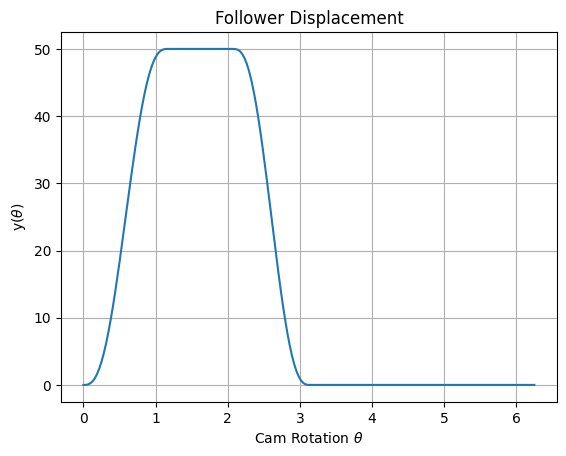

In [124]:
fig, ax = plt.subplots()
ax.plot(thetavec, yvec)
ax.grid()
ax.set_xlabel(r'Cam Rotation $\theta$')
ax.set_ylabel(r'y($\theta$)')
ax.set_title('Follower Displacement')

fig, ax = plt.subplots()
ax.plot(thetavec, vvec)
ax.grid()
ax.set_xlabel(r'Cam Rotation $\theta$')
ax.set_ylabel(r'$y^\prime$($\theta$)')
ax.set_title('Follower Velocity')

Text(0.5, 1.0, 'Follower Acceleration')

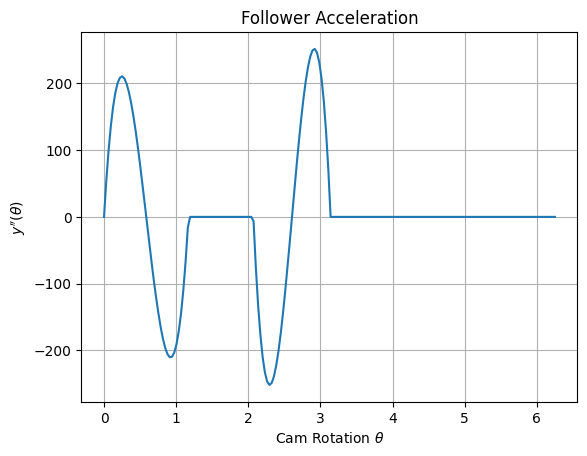

In [125]:
fig, ax = plt.subplots()
ax.plot(thetavec, avec)
ax.grid()
ax.set_xlabel(r'Cam Rotation $\theta$')
ax.set_ylabel(r'$y^{\prime \prime}$($\theta$)')
ax.set_title('Follower Acceleration')

Text(0, 0.5, 'y($\\theta$)+$y^{\\prime \\prime}$($\\theta$)')

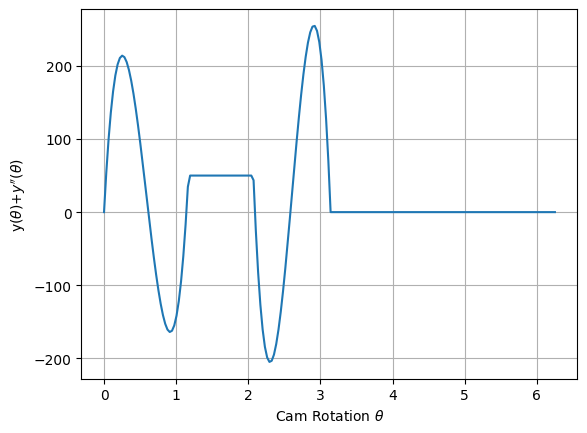

In [126]:
fig, ax = plt.subplots()
ax.plot(thetavec, yvec+avec)
ax.grid()
ax.set_xlabel(r'Cam Rotation $\theta$')
ax.set_ylabel(r'y($\theta$)+$y^{\prime \prime}$($\theta$)')

In [127]:
follower_face_min = np.max(vvec)+np.abs(np.min(vvec))

follower_face_min

np.float64(167.5624534508883)

rho_min = 50 
junk = np.min(yvec+avec)
rb = rho_min-junk
print(np.round(rb))
rb = 260

In [128]:
rho_min = 50 
junk = np.min(yvec+avec)
rb = rho_min-junk
print(np.round(rb))
rb = 260

255.0


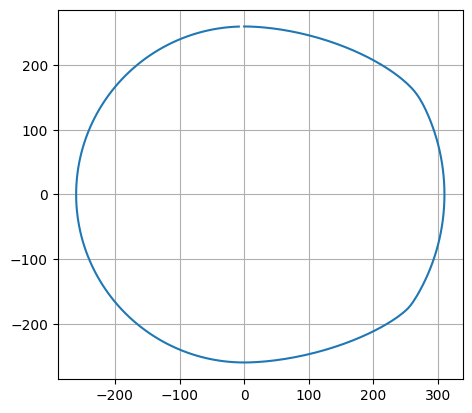

In [129]:
e = 40

theta_c = np.zeros_like(thetavec)
r_c = np.zeros_like(thetavec)

for count in np.arange(np.size(thetavec)):
    thetaval = thetavec[count]
    yval = yvec[count]
    vval = vvec[count]
    junk1 = rb+yval
    r_c[count] = np.sqrt(vval**2+junk1**2)
    theta_c[count] = thetaval+np.arctan2(vval, junk1)
    
    
# transformation to cartesian coordinates    
x_c = np.zeros_like(thetavec)
y_c = np.zeros_like(thetavec)

x_c = r_c*np.sin(theta_c)
y_c = r_c*np.cos(theta_c)

fig, ax = plt.subplots()
ax.plot(x_c, y_c)
ax.set_aspect('equal')
ax.grid()